<a href="https://colab.research.google.com/github/dhananjai14/EDA-on-Forest-Fire-in-Algeria-dataset/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

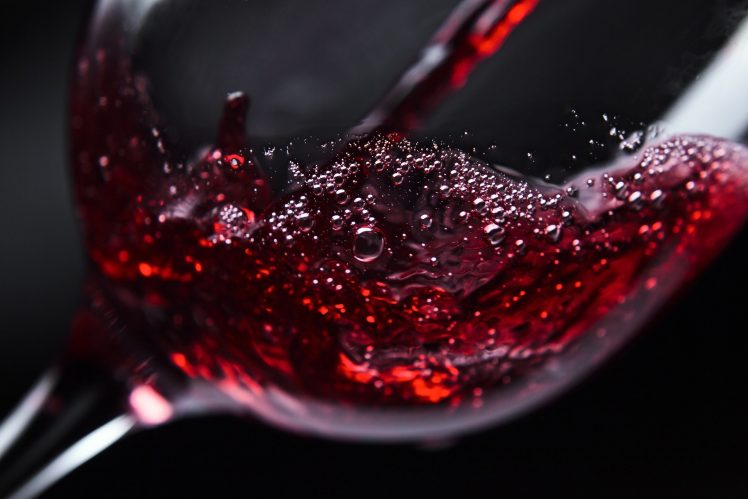

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwallup.net%2Fdrinking-glass-wine-macro%2F&psig=AOvVaw3YTxeIfXWG1z0TllC2_Cd-&ust=1668606578112000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPilg4WqsPsCFQAAAAAdAAAAABAE)

# **Wine Quality Data Set:** Document Flow  

###i. Dataset information 
###1. Data Injestion 
###2. EDA
###3. Preprocessing
###4. Model Building (SVC/SVR)
###5. Evaluation 

**Abstract:** Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, [consult:](http://www.vinhoverde.pt/en/). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Scope of Work:**

These datasets can be viewed as classification or regression tasks. 
1. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). 
2. Outlier detection algorithms could be used to detect the few excellent or poor wines. 
3. We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Attribute Information:**

Input variables (based on physicochemical tests):
1. Feature columns


    * fixed acidity | Continous Data
    * volatile acidity | Continous Data
    * citric acid | Continous Data
    * residual sugar | Continous Data
    * chlorides | Continous Data
    * free sulfur dioxide | Continous Data
    * total sulfur dioxide | Continous Data
    * density | Continous Data
    * pH | Continous Data
    *  sulphates | Continous Data
    *  alcohol | Continous Data


2. Target column


    * quality | Ordinal data (score between 3 to 8)


**Citation:**
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# 1. Data Injestion 

Library Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# from pandas_profiling import ProfileReport
 
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Data Import

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', header = 0, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Shape of dataset**

In [ ]:
data.shape

(1599, 12)

**Summary of dataset**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Checking for null values**

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Proportion of count data on "quality" columns**


In [ ]:
data.quality.unique()
round(data.quality.value_counts()/(len(data))*100,2)

5    42.59
6    39.90
7    12.45
4     3.31
8     1.13
3     0.63
Name: quality, dtype: float64

Obesrvation:
1. Data set is imbalanced

**Univariate analysis** 



**Numerical Columns**

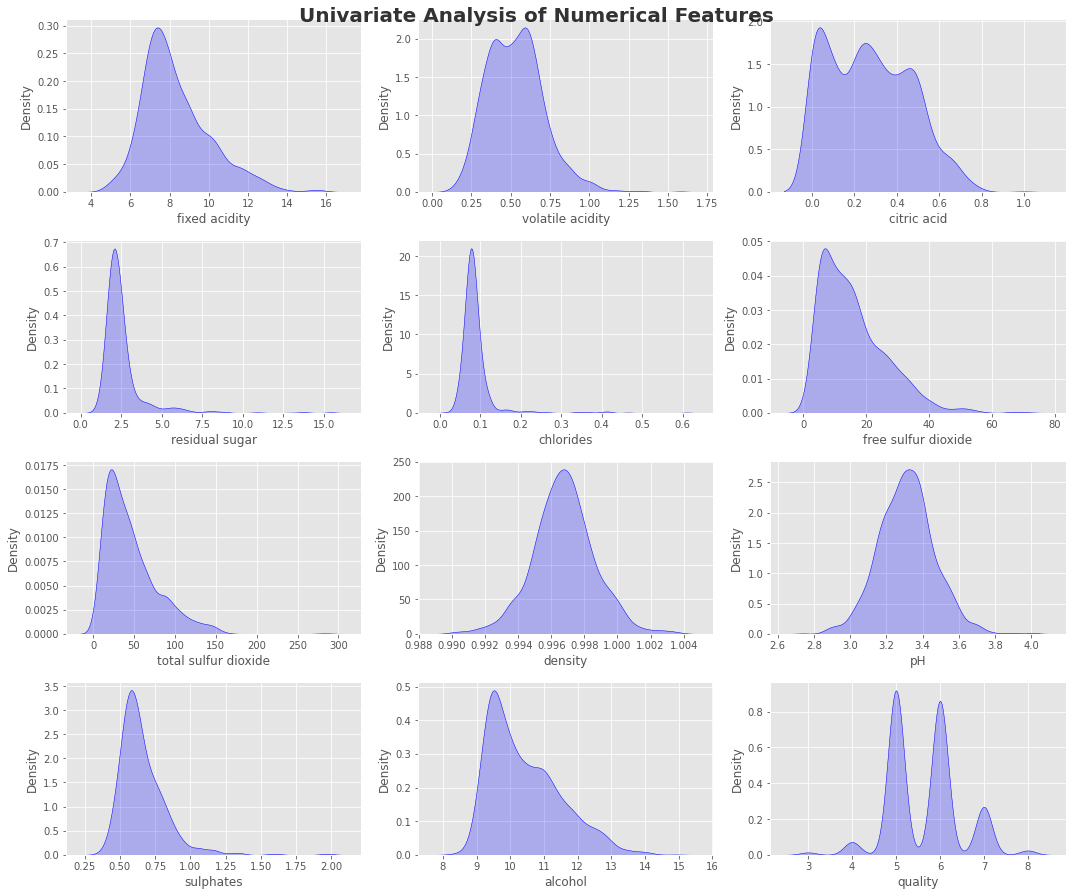

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numerical_features = [col for col in data.columns if data[col].dtypes != 'O']

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

Observations:
1. **Normally distributed columns:** 'density',  'pH' . 
2. **Column with Outliers:** 'Residual Sugar', 'Chlorides' 
3. **Left skewed Columns:** 'Fixed acidity', 'Free sulphur dioxide', 'Total sulphur dioxide', 'sulphates', 'alcohol'   
4.  **Right skewed Columns:** No such column
5. **Columns with uneven distribution:** Volatile acidic, citric acid

**Multivariate analysis**

* Multivariate analysis is the analysis of more than one variable.

**Checking for multicolinearity**

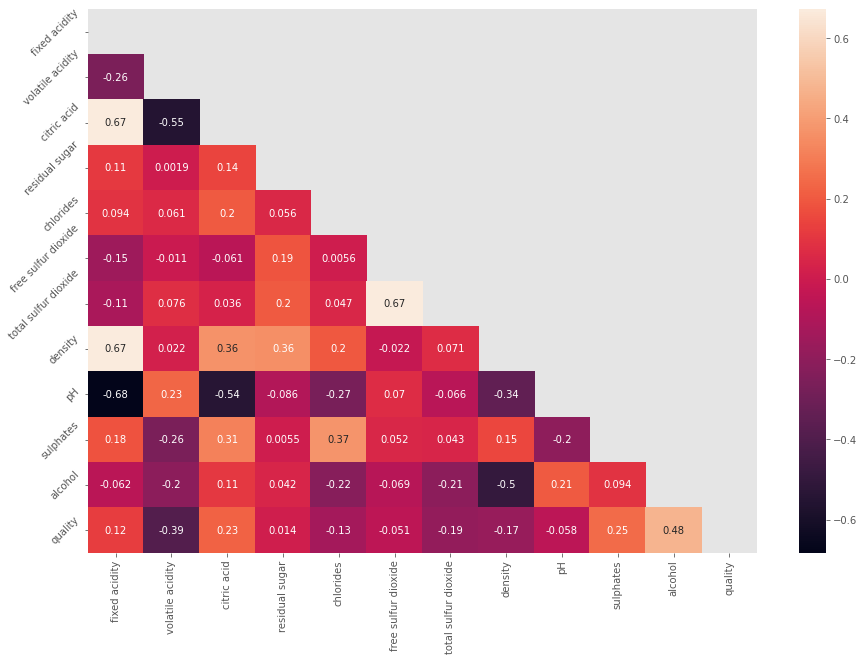

In [ ]:
# In numerical column
plt.figure(figsize = (15,10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask = matrix)
plt.yticks(rotation=45)
plt.show()

Observations: 

1. **Very highly correlated columns (corr > .90):** None 
2. **High correlated columns (corr > 90):** None


Relation between feature and label column 

In [ ]:
feature = data.drop(columns = 'quality')
feature.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Here we will make an approach to understand the relation between the feature and target columns.

* **Feature columns are:** 

    'fixed acidity', 'volatile acidity',  'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'


* **Label columns:** 

    'quality'



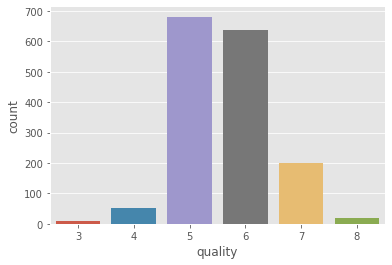

In [ ]:
# Getting the percentage of each category in 'quality' column
sns.countplot(x = 'quality', data= data)  

In [ ]:
feature_continous = [col for col in feature.columns if data[col].dtypes != 'O']

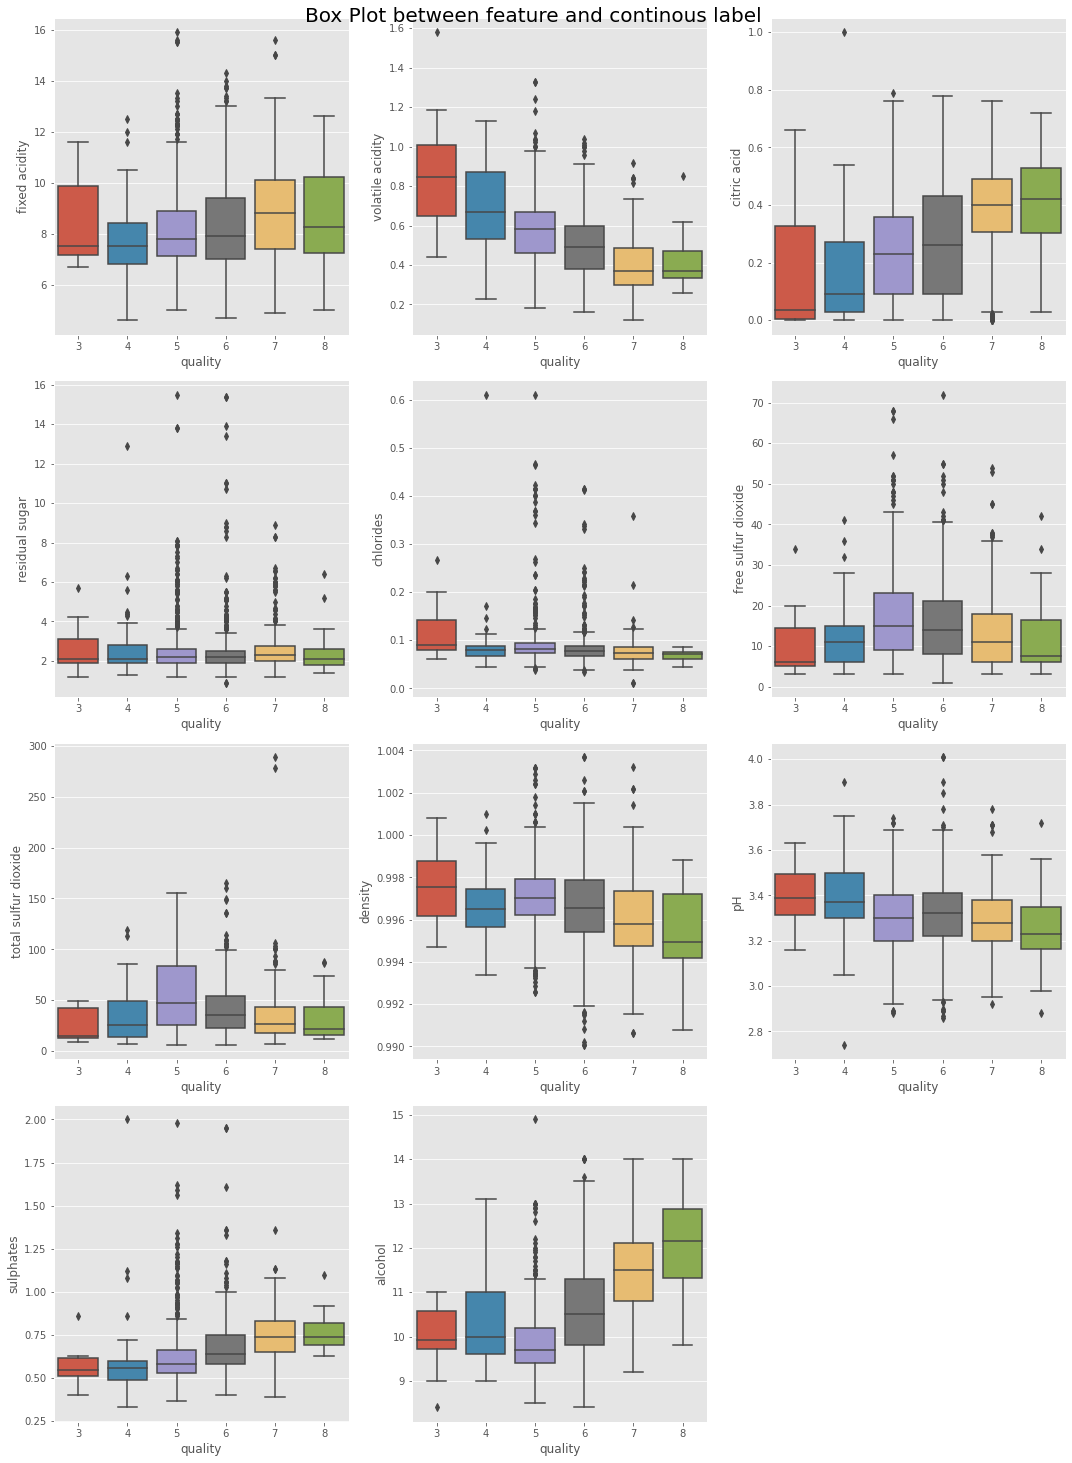

In [ ]:
fig = plt.figure(figsize=(15, 50))
plt.suptitle('Box Plot between feature and continous label ', fontsize = 20, y = 1)

for i in range(0, len(feature_continous)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data = data, x = 'quality', y = data[feature_continous[i]])
    plt.tight_layout()

**Preliminary Conclusions:**
1. Increasing sulphates will imporove the quality of wine.
1. Increasing alcohol will imporove the quality of wine. 
1. Decreasing volatilic acid will imporove the quality of wine. 
1. Increasing citric acid will imporove the quality of wine. 




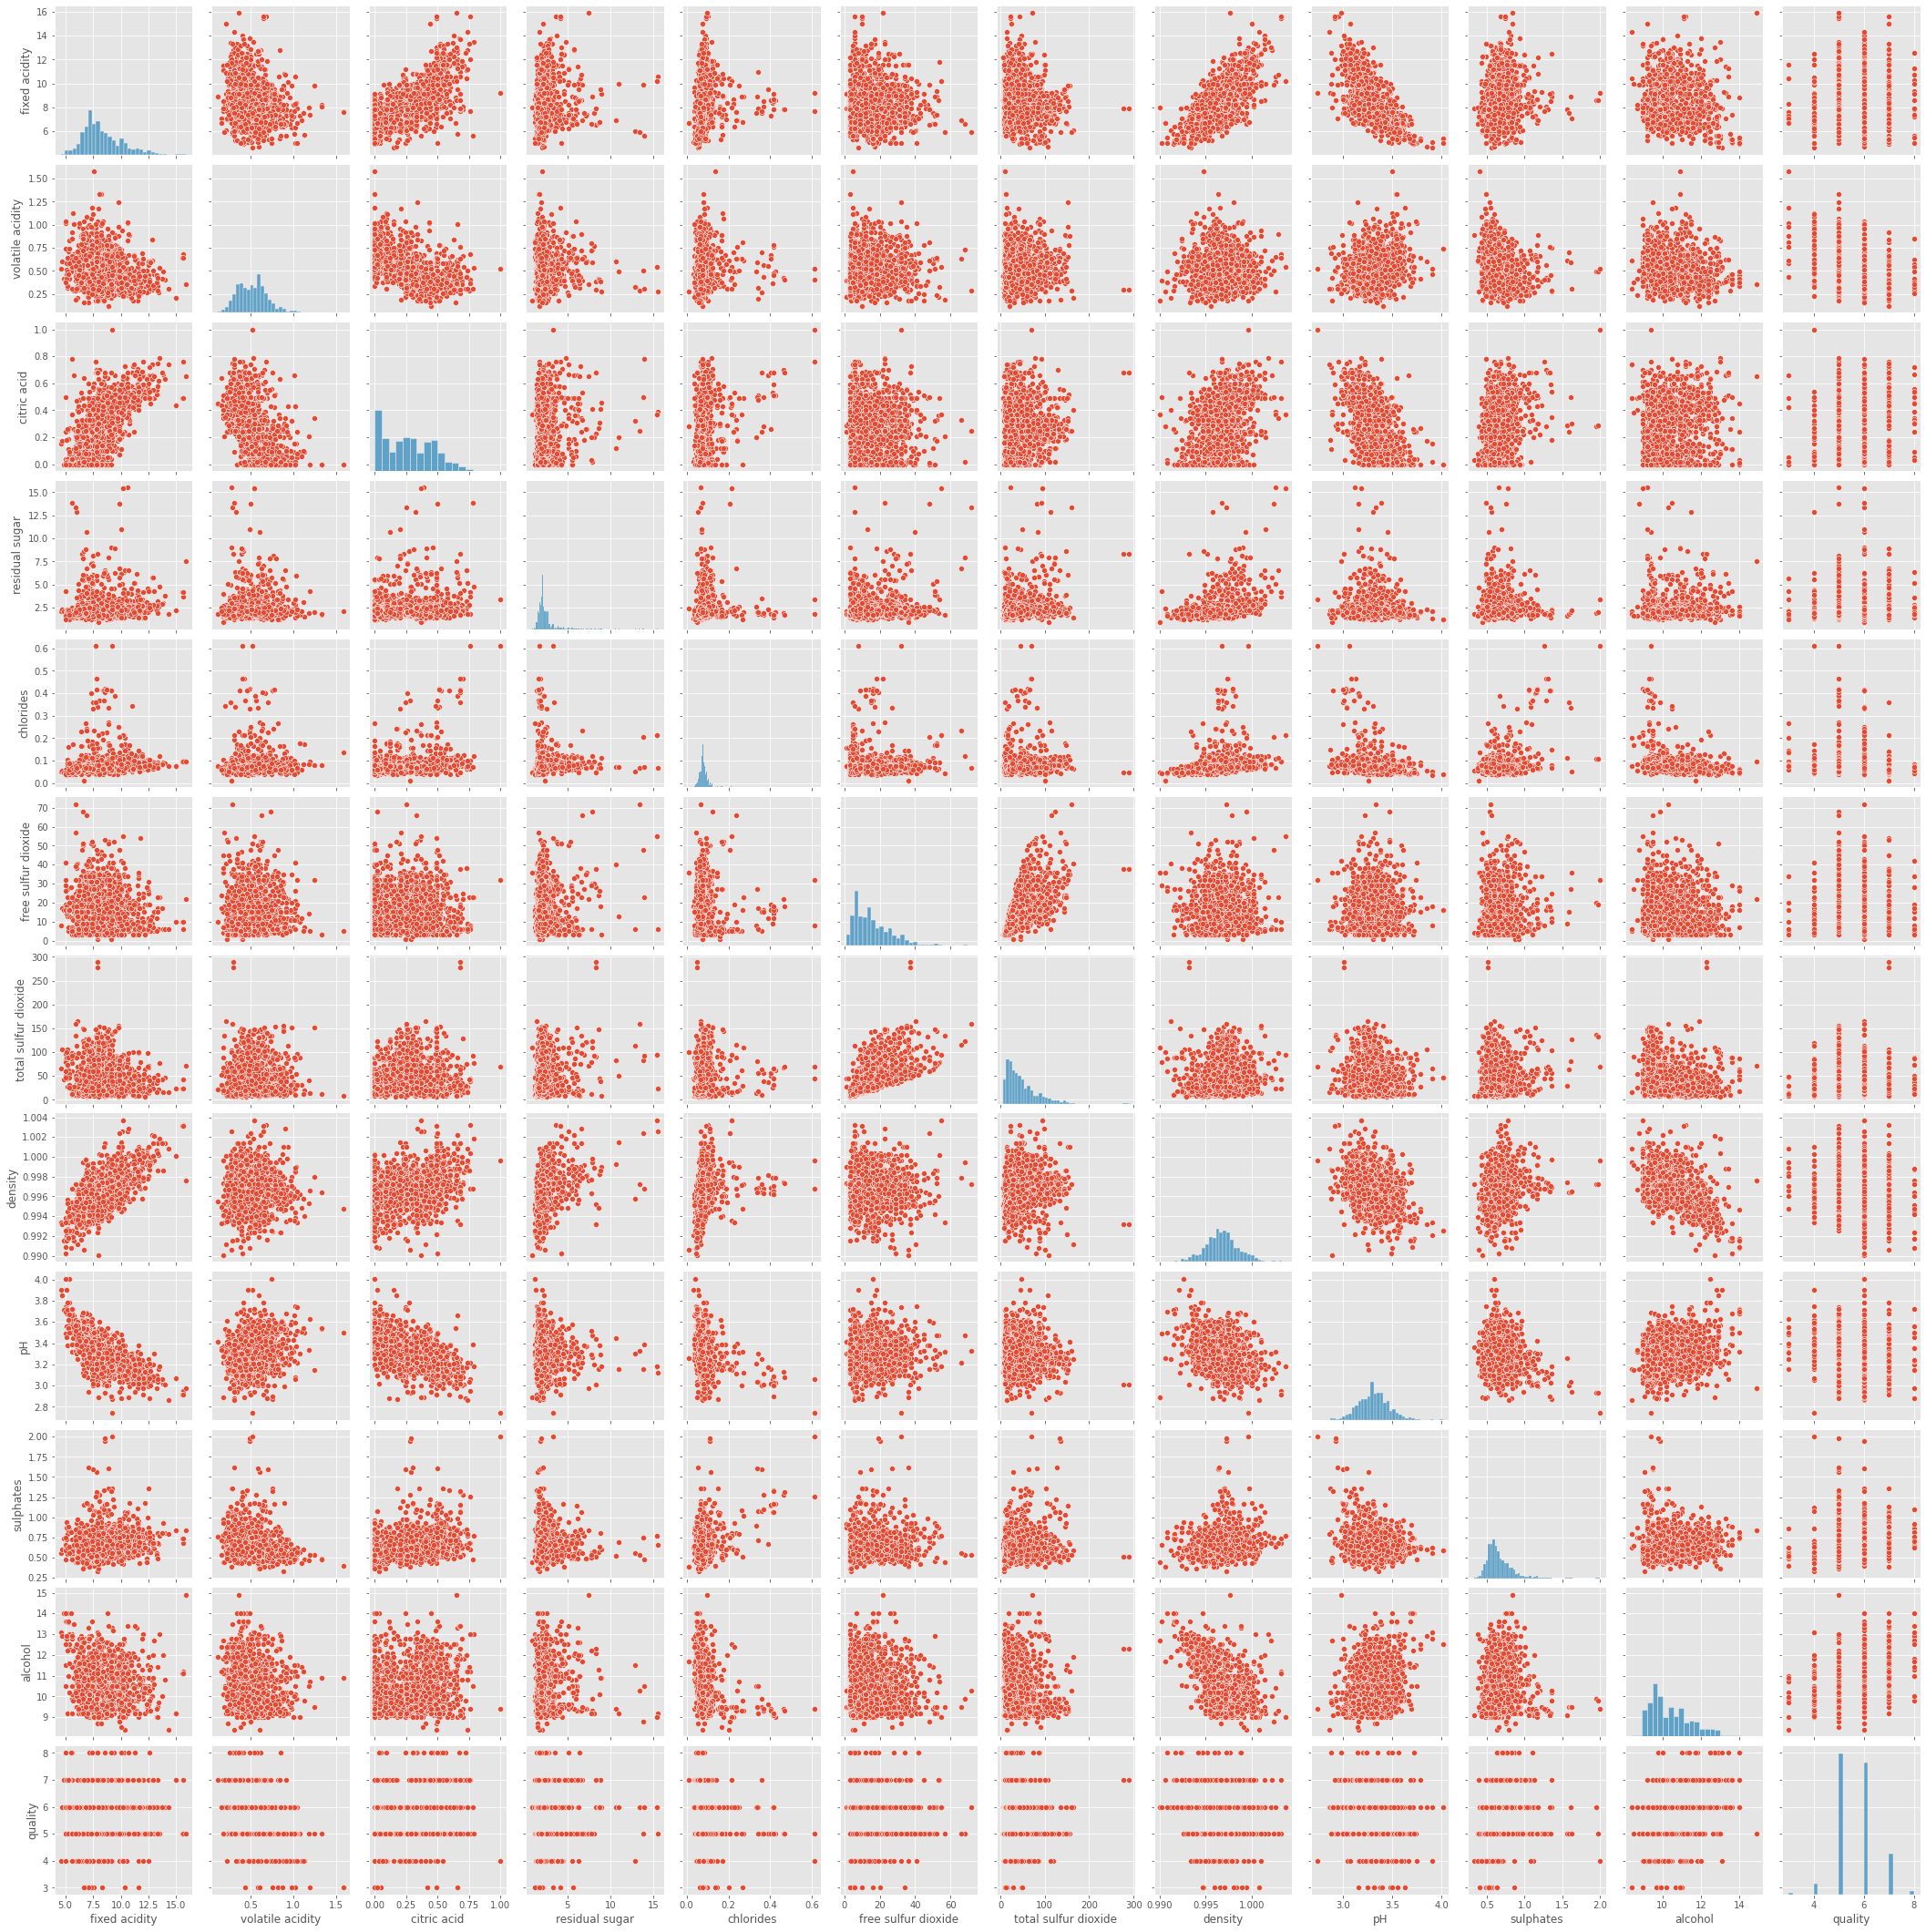

In [ ]:
sns.pairplot(data)

# Preprocessing

Bringing down the data to same scale will surely reduce the computation time

In [ ]:
x = data.drop(columns = 'quality')
y = data['quality']


In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x , y, test_size = .2, random_state = 0)

In [ ]:
scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train)
# get the parameter 
scaler.mean_


array([ 8.33737295,  0.53      ,  0.27218139,  2.55316654,  0.08702424,
       16.03283815, 47.11415168,  0.99675746,  3.30982799,  0.6590774 ,
       10.41399531])

In [ ]:
x_test_tf = scaler.transform(x_test)


# Model Building

In [ ]:
from sklearn.svm import SVC 

Raw SVC

In [ ]:
model_svc = SVC()
model_svc.fit(x_train_tf, y_train)
model_svc.score(x_train_tf, y_train)
print(f"Accuracy score is: {model_svc.score(x_train_tf, y_train)}") 
predict_raw = model_svc.predict(x_test_tf)




Accuracy score is: 0.6669272869429241


Tuning the SVC

In [ ]:
model_svc_tune = SVC()
params = [{'C': [.5,.9,1,1.2,1.3,1.5]}]
clf = GridSearchCV(model_svc_tune, params, cv = 10, scoring='accuracy')
clf.fit(x_train_tf, y_train)
print(f'best value of C is {clf.best_params_}')

model_svc_tune = SVC()
params = {'kernel': [  'rbf','linear','poly','sigmoid' ],
           'degree': [  2,3,4,5,6 ]}
clf = GridSearchCV(model_svc_tune, params, cv = 10, scoring='accuracy')
clf.fit(x_train_tf, y_train)
print(clf.best_params_)

model_svc_tune = SVC()
params = {'gamma' :[0.8,0.9,1,1.1,1.2,1.3]}
clf = GridSearchCV(model_svc_tune, params, cv = 10, scoring='accuracy')
clf.fit(x_train_tf, y_train)
print(clf.best_params_)

best value of C is {'C': 1.2}
{'degree': 2, 'kernel': 'rbf'}
{'gamma': 1}


In [ ]:
params = {
    'C': [.9,1,1.2,1.3],
    'kernel':['rbf','linear'],
    'gamma': [.9,1,1.1]
}

clf = GridSearchCV(model_svc_tune, params, cv = 10, scoring='accuracy')
clf.fit(x_train_tf, y_train)
print(clf.best_params_)

{'C': 1.3, 'gamma': 1.1, 'kernel': 'rbf'}


In [ ]:
model_svc_tune = SVC(C = 1.3,kernel= 'rbf', gamma = 1.3)
model_svc_tune.fit(x_train_tf, y_train)
predict_tuned = model_svc_tune.predict(x_test_tf)

# Evaluation

**Raw Model**

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, predict_raw)}')


Accuracy Score: 0.64375


In [ ]:
print('Classification report')
print(classification_report(y_test, predict_raw))


Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.75      0.71       135
           6       0.63      0.68      0.66       142
           7       0.50      0.30      0.37        27
           8       0.00      0.00      0.00         3

    accuracy                           0.64       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.61      0.64      0.62       320



**Tuned Model**

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, predict_tuned)}')


Accuracy Score: 0.675


In [ ]:
print('Classification Report')
print(classification_report(y_test, predict_tuned))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.79      0.72       135
           6       0.70      0.68      0.69       142
           7       0.71      0.44      0.55        27
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.34      0.32      0.33       320
weighted avg       0.65      0.68      0.66       320



In [ ]:
pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")